In [1]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import util
import pandas as pd
from datetime import timedelta

root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/' #2018_2021_global_m5/'#'/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m5/'
eq_list = os.listdir(root)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml') #2018_2021_global_m5_catalog.xml')
dists = []

eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])

In [2]:
counts = pd.DataFrame({'3.0':[0, 0, 0, 0, 0, 0, 0, 0],
                   '3.1':[0, 0, 0, 0, 0, 0, 0, 0],
                   '3.2':[0, 0, 0, 0, 0, 0, 0, 0],
                   '3.3':[0, 0, 0, 0, 0, 0, 0, 0],
                   '3.4':[0, 0, 0, 0, 0, 0, 0, 0],
                   '3.5':[0, 0, 0, 0, 0, 0, 0, 0],
                   '3.6':[0, 0, 0, 0, 0, 0, 0, 0],
                   '3.7':[0, 0, 0, 0, 0, 0, 0, 0],
                   '3.8':[0, 0, 0, 0, 0, 0, 0, 0],
                   '3.9':[0, 0, 0, 0, 0, 0, 0, 0],
                   '4.0':[0, 0, 0, 0, 0, 0, 0, 0],
                   '4.1':[0, 0, 0, 0, 0, 0, 0, 0],
                   '4.2':[0, 0, 0, 0, 0, 0, 0, 0],
                   '4.3':[0, 0, 0, 0, 0, 0, 0, 0],
                   '4.4':[0, 0, 0, 0, 0, 0, 0, 0],
                   '4.5':[0, 0, 0, 0, 0, 0, 0, 0],
                   '4.6':[0, 0, 0, 0, 0, 0, 0, 0],
                   '4.7':[0, 0, 0, 0, 0, 0, 0, 0],
                   '4.8':[0, 0, 0, 0, 0, 0, 0, 0],
                   '4.9':[0, 0, 0, 0, 0, 0, 0, 0],
                   '5.0':[0, 0, 0, 0, 0, 0, 0, 0],
                   '5.1':[0, 0, 0, 0, 0, 0, 0, 0],
                   '5.2':[0, 0, 0, 0, 0, 0, 0, 0],
                   '5.3':[0, 0, 0, 0, 0, 0, 0, 0],
                   '5.4':[0, 0, 0, 0, 0, 0, 0, 0],
                   '5.5':[0, 0, 0, 0, 0, 0, 0, 0],
                   '5.6':[0, 0, 0, 0, 0, 0, 0, 0],
                   '5.7':[0, 0, 0, 0, 0, 0, 0, 0],
                   '5.8':[0, 0, 0, 0, 0, 0, 0, 0],
                   '5.9':[0, 0, 0, 0, 0, 0, 0, 0],
                   '6.0':[0, 0, 0, 0, 0, 0, 0, 0],
                   '6.1':[0, 0, 0, 0, 0, 0, 0, 0],
                   '6.2':[0, 0, 0, 0, 0, 0, 0, 0],
                   '6.3':[0, 0, 0, 0, 0, 0, 0, 0],
                   '6.4':[0, 0, 0, 0, 0, 0, 0, 0],
                   '6.5':[0, 0, 0, 0, 0, 0, 0, 0],
                   '6.6':[0, 0, 0, 0, 0, 0, 0, 0],
                   '6.7':[0, 0, 0, 0, 0, 0, 0, 0],
                   '6.8':[0, 0, 0, 0, 0, 0, 0, 0],
                   '6.9':[0, 0, 0, 0, 0, 0, 0, 0],
                   '7.0':[0, 0, 0, 0, 0, 0, 0, 0]})

iv2 = pd.DataFrame({'3.0':[[], [], [], [], [], [], [], []],
                   '3.1':[[], [], [], [], [], [], [], []],
                   '3.2':[[], [], [], [], [], [], [], []],
                   '3.3':[[], [], [], [], [], [], [], []],
                   '3.4':[[], [], [], [], [], [], [], []],
                   '3.5':[[], [], [], [], [], [], [], []],
                   '3.6':[[], [], [], [], [], [], [], []],
                   '3.7':[[], [], [], [], [], [], [], []],
                   '3.8':[[], [], [], [], [], [], [], []],
                   '3.9':[[], [], [], [], [], [], [], []],
                   '4.0':[[], [], [], [], [], [], [], []],
                   '4.1':[[], [], [], [], [], [], [], []],
                   '4.2':[[], [], [], [], [], [], [], []],
                   '4.3':[[], [], [], [], [], [], [], []],
                   '4.4':[[], [], [], [], [], [], [], []],
                   '4.5':[[], [], [], [], [], [], [], []],
                   '4.6':[[], [], [], [], [], [], [], []],
                   '4.7':[[], [], [], [], [], [], [], []],
                   '4.8':[[], [], [], [], [], [], [], []],
                   '4.9':[[], [], [], [], [], [], [], []],
                   '5.0':[[], [], [], [], [], [], [], []],
                   '5.1':[[], [], [], [], [], [], [], []],
                   '5.2':[[], [], [], [], [], [], [], []],
                   '5.3':[[], [], [], [], [], [], [], []],
                   '5.4':[[], [], [], [], [], [], [], []],
                   '5.5':[[], [], [], [], [], [], [], []],
                   '5.6':[[], [], [], [], [], [], [], []],
                   '5.7':[[], [], [], [], [], [], [], []],
                   '5.8':[[], [], [], [], [], [], [], []],
                   '5.9':[[], [], [], [], [], [], [], []],
                   '6.0':[[], [], [], [], [], [], [], []],
                   '6.1':[[], [], [], [], [], [], [], []],
                   '6.2':[[], [], [], [], [], [], [], []],
                   '6.3':[[], [], [], [], [], [], [], []],
                   '6.4':[[], [], [], [], [], [], [], []],
                   '6.5':[[], [], [], [], [], [], [], []],
                   '6.6':[[], [], [], [], [], [], [], []],
                   '6.7':[[], [], [], [], [], [], [], []],
                   '6.8':[[], [], [], [], [], [], [], []],
                   '6.9':[[], [], [], [], [], [], [], []],
                   '7.0':[[], [], [], [], [], [], [], []]})
list_mag = []
list_dist = []
list_iv2 = []

0 out of 6077
20190131_194949.a
9 Trace(s) in Stream:
CX.HMBCX..HHE | 2019-01-31T19:44:44.679999Z - 2019-01-31T19:54:50.669999Z | 100.0 Hz, 60600 samples
CX.HMBCX..HHN | 2019-01-31T19:44:45.679999Z - 2019-01-31T19:54:52.669999Z | 100.0 Hz, 60700 samples
CX.HMBCX..HHZ | 2019-01-31T19:44:48.679999Z - 2019-01-31T19:54:51.669999Z | 100.0 Hz, 60300 samples
CX.PB01..HHE  | 2019-01-31T19:44:45.158393Z - 2019-01-31T19:54:55.618393Z | 100.0 Hz, 61047 samples
CX.PB01..HHN  | 2019-01-31T19:44:43.958393Z - 2019-01-31T19:54:50.018393Z | 100.0 Hz, 60607 samples
CX.PB01..HHZ  | 2019-01-31T19:44:46.698393Z - 2019-01-31T19:54:54.378393Z | 100.0 Hz, 60769 samples
CX.PB08..HHE  | 2019-01-31T19:44:46.698393Z - 2019-01-31T19:54:54.828393Z | 100.0 Hz, 60814 samples
CX.PB08..HHN  | 2019-01-31T19:44:47.448394Z - 2019-01-31T19:54:55.738394Z | 100.0 Hz, 60830 samples
CX.PB08..HHZ  | 2019-01-31T19:44:44.298393Z - 2019-01-31T19:54:50.548393Z | 100.0 Hz, 60626 samples
60.1987628598
in if
384.050552293
in if
523.77

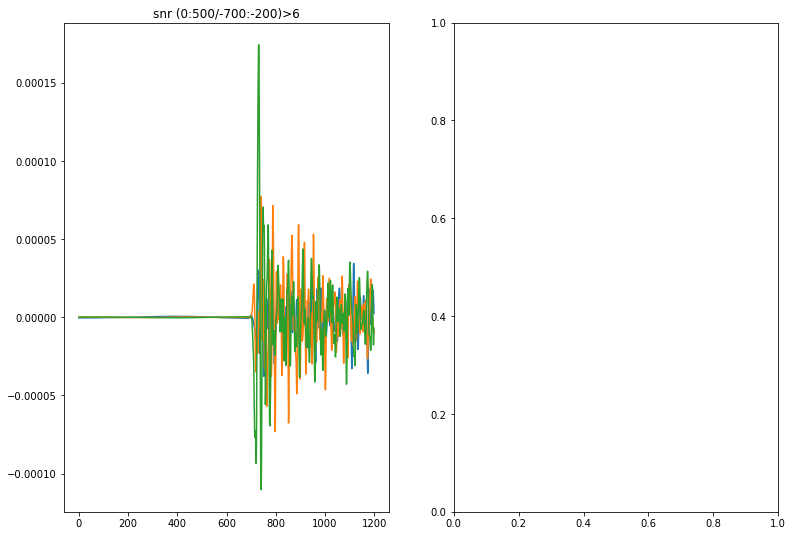

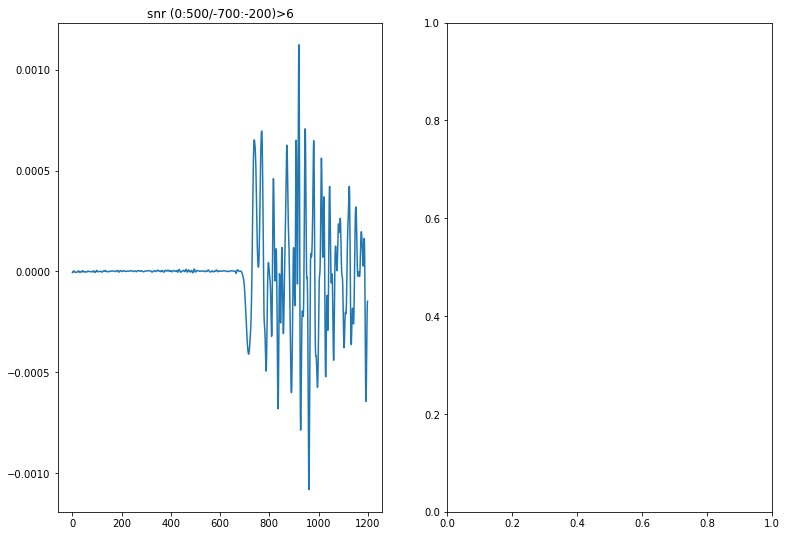

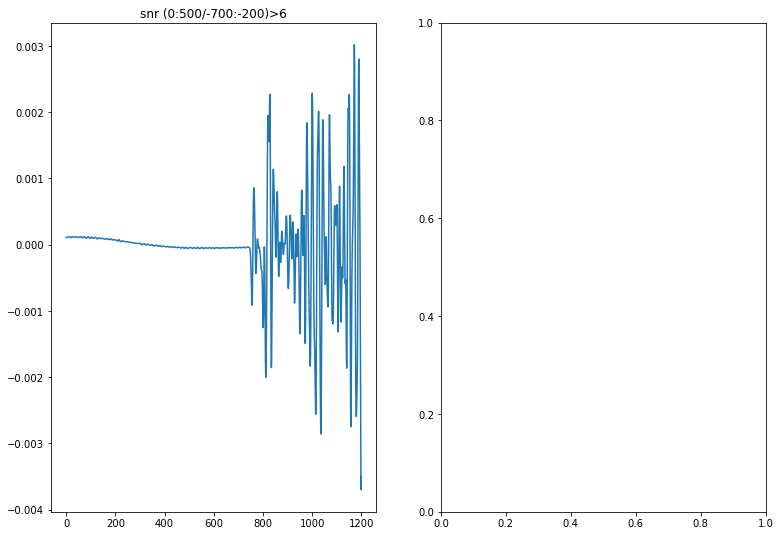

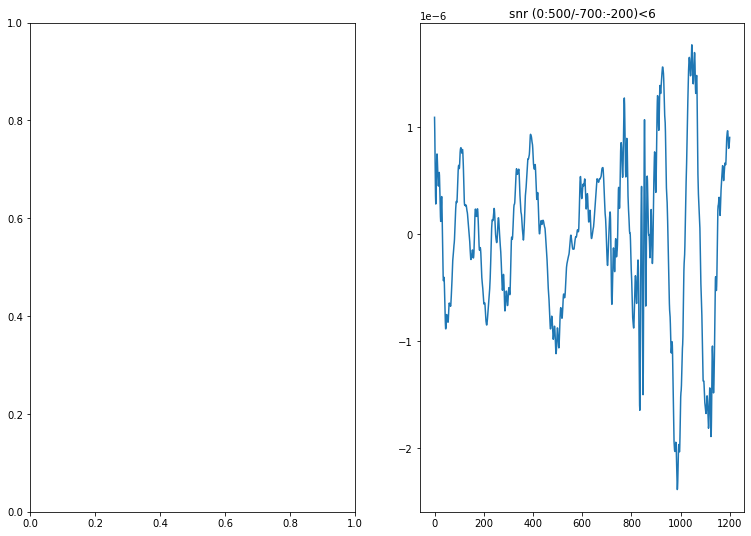

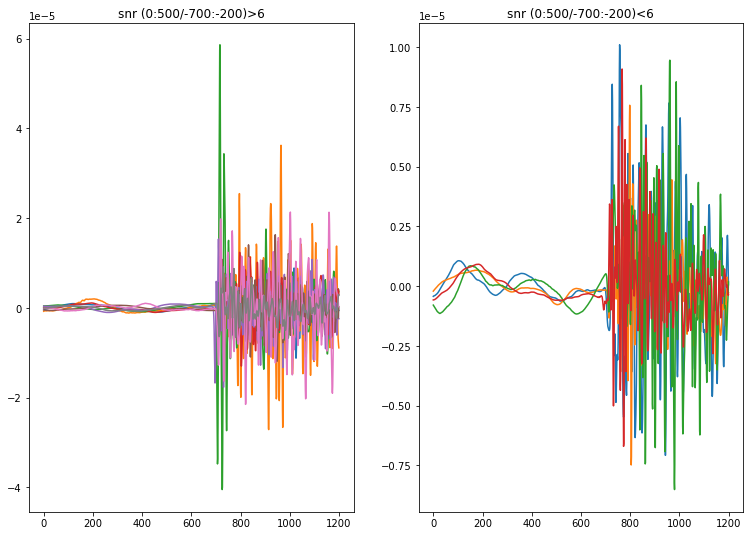

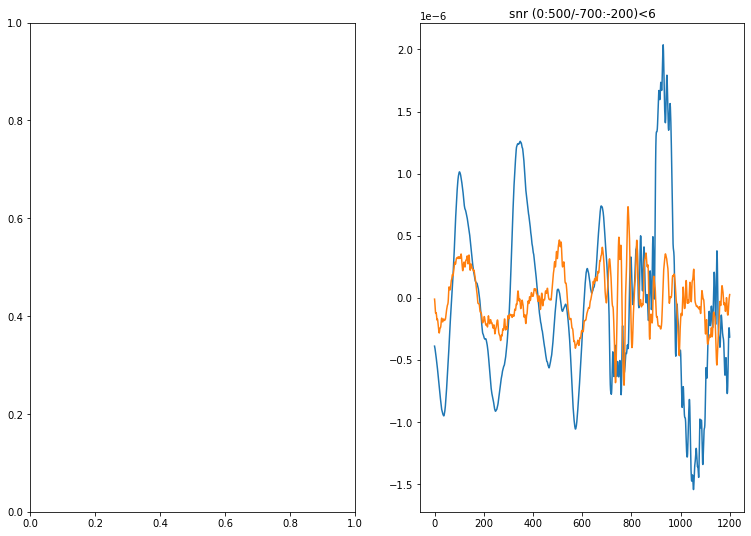

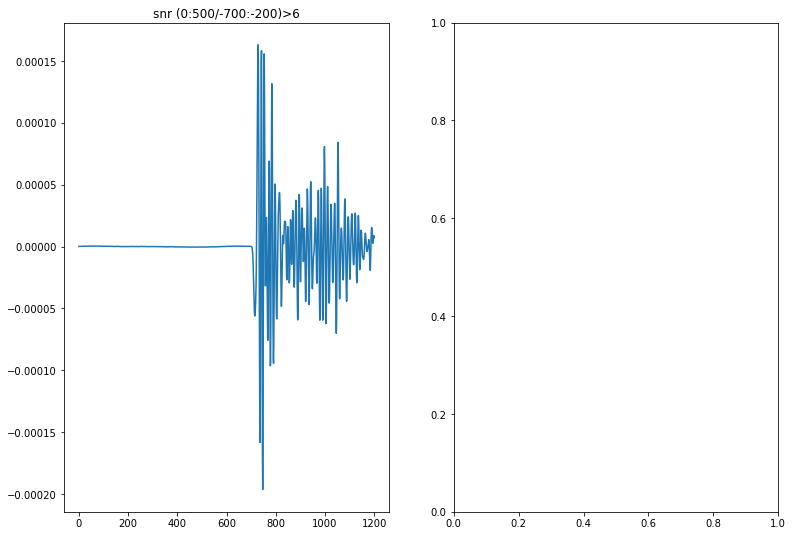

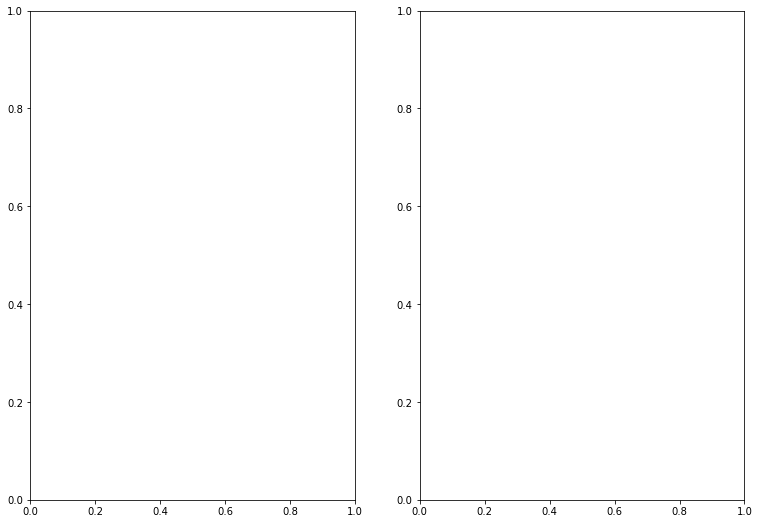

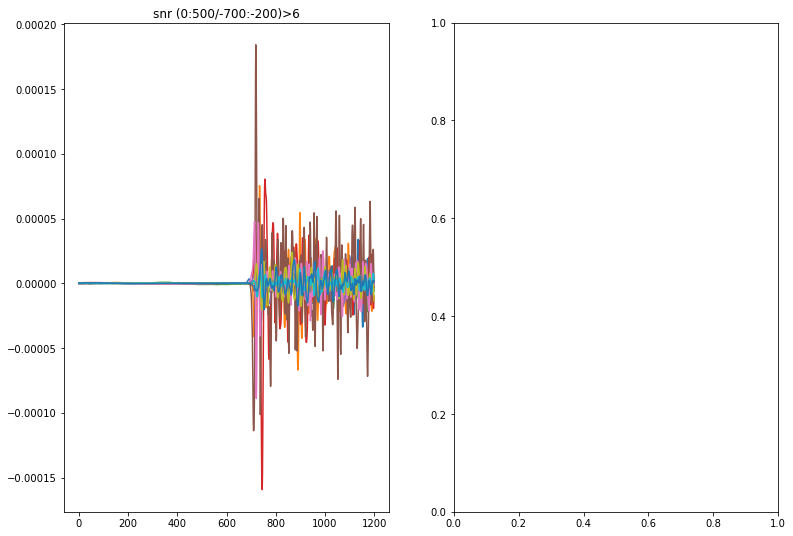

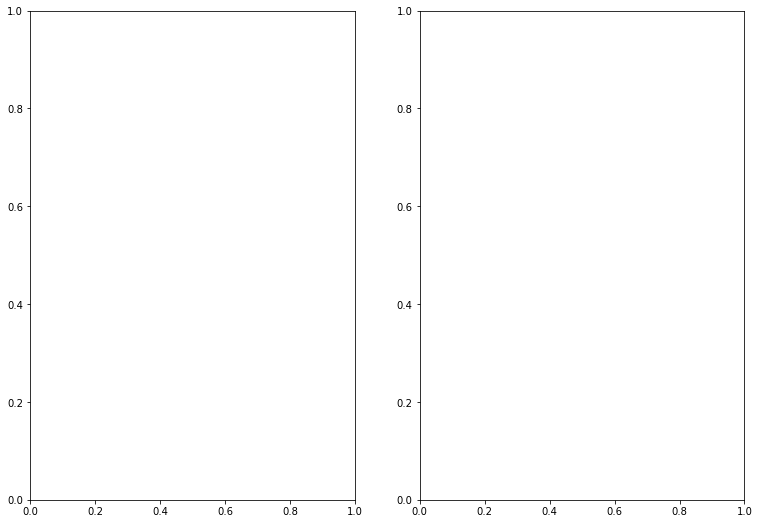

In [11]:
eq_no = 0
        
for eq_name in eq_with_data[eq_no:eq_no+10]:
    print(str(eq_no) + ' out of '+ str(len(eq_with_data)))# find matching cat event:
    eq_no += 1
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break
    print(eq_name)
    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    data.interpolate(100, 'lanczos', a = 20)
    print(data)
    inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')
    #print('data read')
    with open(root+eq_name+'/picks.pkl', 'rb') as f:
        picks = pickle.load(f)
    n_records = 0
    sampling_rate = 100 # get this from tr.stats.sampling_rate
    # sensor_types = self.data_stats['sensor_types'] for automated OOP
    #print('start for')
    fig, axs = plt.subplots(1,2, figsize = (12.8, 9))
    for i in range(0, len(data)):  # iterate through all traces
        tr_name = data[i].stats.network+'.'+data[i].stats.station+'.'+data[i].stats.location
        if data[i].stats.channel[2] == 'Z' and tr_name in picks.keys():  # only use vertical components at stations with a pick
            #try:
            tr = data[i].copy()
            station = tr.stats.station
            station = station.ljust(4)
            sta_lat = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].latitude
            sta_long = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].longitude
            distance = np.sqrt((eq_lat - sta_lat)**2 + (eq_long - sta_long)**2) * 110
            tr_name = tr.stats.network+'.'+tr.stats.station+'.'+tr.stats.location

            if tr_name in picks.keys() and distance < 200:
                # load saved parameters
                #tr.plot()
                pick = picks[tr_name]
                pick = UTCDateTime(picks[tr_name])
                #pick_samples = int(round((UTCDateTime(pick) - tr.stats.starttime)*tr.stats.sampling_rate, 0))                            
                tr.trim(pick-timedelta(seconds = 10), pick+timedelta(seconds = 10))
                #tr.plot()
                pick_samples = int(10 * tr.stats.sampling_rate)
                tr.remove_response(inv)
                tr.filter('bandpass', freqmin = 0.075, freqmax = 10)
                snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples-700:pick_samples-200]))
                print(snr)
                if snr>10:
                    axs[0].plot(tr.data[pick_samples-700:pick_samples+500])
                    axs[0].set_title('snr (0:500/-700:-200)>6')
                else:
                    axs[1].plot(tr.data[pick_samples-700:pick_samples+500])
                    axs[1].set_title('snr (0:500/-700:-200)<6')
                sampling_rate = tr.stats.sampling_rate
                if snr>10:
                    print('in if')
                    start = pick_samples # int((pick - tr.stats.starttime)*sampling_rate)
                    end = int(start + 3 * sampling_rate)
                    vel = tr.copy()
                    v2 = vel.copy()
                    v2.data = vel.data[start:end]**2
                    iv2_this = v2.integrate()
                    #print(iv2_this.data[-1])
                    current = iv2[eq_mag_str][int(distance//25)]
                    current.append(iv2_this.data[-1])
                    iv2[eq_mag_str][int(distance//25)] = current
                    list_iv2.append(iv2_this.data[-1])
                    list_mag.append(eq_mag)
                    list_dist.append(distance)
                    counts[eq_mag_str][int(distance//25)] = counts[str(np.floor(eq_mag))][int(distance//25)]  + 1
plt.show()